In [1]:
# import libraries
import pandas as pd    
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

import plotly.express as px
from datetime import datetime

import pickle

#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Load data

In [2]:
restaurants = pd.read_pickle('../data/restaurants_cleaned.pkl')

In [3]:
restaurants.head()

business_id                           name              address  \
0  tCbdrRPZA0oiIYSmHG3J0w        Flying Elephants at PDX  7000 NE Airport Way   
1  HPA_qyMEddpAEtFof02ixg            Mr G's Pizza & Subs        474 Lowell St   
2  jGennaZUr2MsJyRhijNBfA                Legal Sea Foods      1 Harborside Dr   
3  iPD8BBvea6YldQZPHzVrSQ                Espresso Minute         334 Mass Ave   
4  jx91IMdGOmLOo8h_F9z39g  Cleary's Restaurant & Spirits   12429 NE Glisan St   

       city state postal_code   latitude   longitude  stars  review_count  \
0  Portland    OR       97218  45.588906 -122.593331    4.0           126   
1   Peabody    MA       01960  42.541155  -70.973438    4.0            39   
2    Boston    MA       02128  42.363442  -71.025781    3.5           856   
3    Boston    MA       02115  42.342673  -71.084239    4.5             7   
4  Portland    OR       97230  45.526473 -122.535323    3.5            19   

   ...  garage    lot  street  valet validated RestaurantsAttire NoiseLevel  \
0  ...    True  False   False  False     False            casual          2   
1  ...   False   True   False  False     False            casual          2   
2  ...    True  False   False  False     False            casual          2   
3  ...   False  False   False  False     False            casual          1   
4  ...   False   True   False  False     False            casual          2   

   WiFi        Alcohol sentiment_final  
0  Free  beer_and_wine        0.366400  
1  Free            NaN        0.132592  
2  Free       full_bar        0.090394  
3   NaN            NaN        0.655234  
4    No       full_bar       -0.114162  

[5 rows x 43 columns]

In [4]:
user_reviews = pd.read_pickle('../data/user_reviews_cleaned.pkl')

In [5]:
user_reviews.head()

index               review_id                 user_id  \
0      0  lWC-xP3rd6obsecCYsGZRg  ak0TdVmGKo4pwqdJSTLwWw   
1      5  J4a2TuhDasjn2k3wWtHZnQ  RNm_RWkcd02Li2mKPRe7Eg   
2      6  28gGfkLs3igtjVy61lh77Q  Q8c91v7luItVB0cMFF_mRA   
3      9  KKVFopqzcVfcubIBxmIjVA  99RsBrARhhx60UnAC4yDoA   
4     18  btNWW2kdJYfwpTDyzJO3Iw  DECuRZwkUw8ELQZfNGef2Q   

              business_id  stars  useful  funny  cool  \
0  buF9druCkbuXLX526sGELQ    4.0       3      1     1   
1  xGXzsc-hzam-VArK6eTvtw    1.0       2      0     0   
2  EXOsmAB1s71WePlQk0WZrA    2.0       0      0     0   
3  EEHhKSxUvJkoPSzeGKkpVg    5.0       0      0     0   
4  zmZ3HkVCeZPBefJJxzdJ7A    4.0       0      0     0   

                                                text                date  year  
0  Apparently Prides Osteria had a rough summer a... 2014-10-11 03:34:02  2014  
1  This place used to be a cool, chill place. Now... 2018-01-21 04:41:03  2018  
2  The setting is perfectly adequate, and the foo... 2006-04-16 02:58:44  2006  
3  I work in the Pru and this is the most afforda... 2014-05-07 18:10:21  2014  
4  Nothing special but good enough.  I like anoth... 2012-12-04 04:29:47  2012

## Exploratory Data Analysis

### Visualize the location of restaurants using plotly

In [6]:
fig = px.scatter_mapbox(restaurants, lat="latitude", lon="longitude", hover_name="name", hover_data=["stars", "is_open"],
                        color_discrete_sequence=["#F43939"], zoom=3, height=300)
fig.update_layout(mapbox_style="dark", mapbox_accesstoken='pk.eyJ1IjoicmF5bGltOTEiLCJhIjoiY2wxMHQ5eTQ2MTRuZTNvbzM3MnB0ZDdoayJ9.1TEwS3IFZlqwn9a8rR0fBA')
fig.update_layout(height=1000,margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Restaurants Distribution
#### Distribution of restaurants in each category

In [7]:
plt.style.use('ggplot')

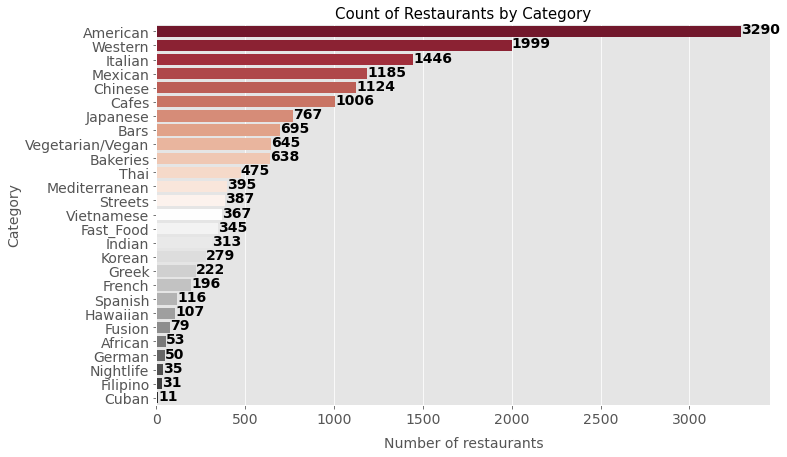

In [8]:
plt.figure(figsize=(11,7))
grouped = restaurants.category.value_counts()
sns.countplot(y='category',data=restaurants, 
              order = grouped.index, palette= sns.color_palette("RdGy", len(grouped)))
plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Restaurants by Category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(restaurants.category.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

##  Top 10 cities with most restaurants

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



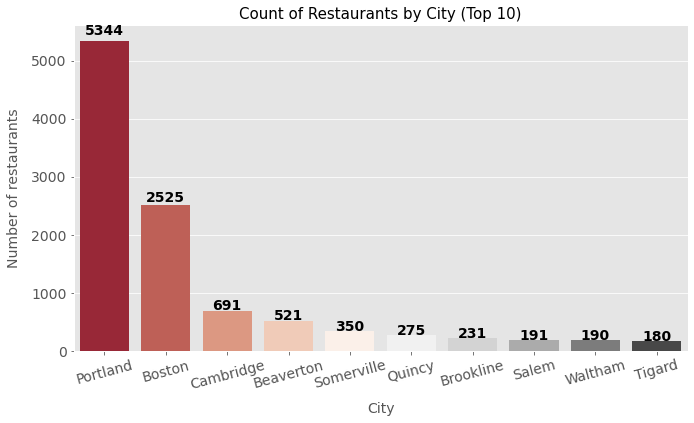

In [9]:
plt.figure(figsize=(11,6))
grouped = restaurants.city.value_counts()[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdGy", len(grouped)))
plt.ylabel('Number of restaurants', fontsize=14, labelpad=10)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.title('Count of Restaurants by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

### Reviews Distribution

#### Distribution of reviews by cuisine type

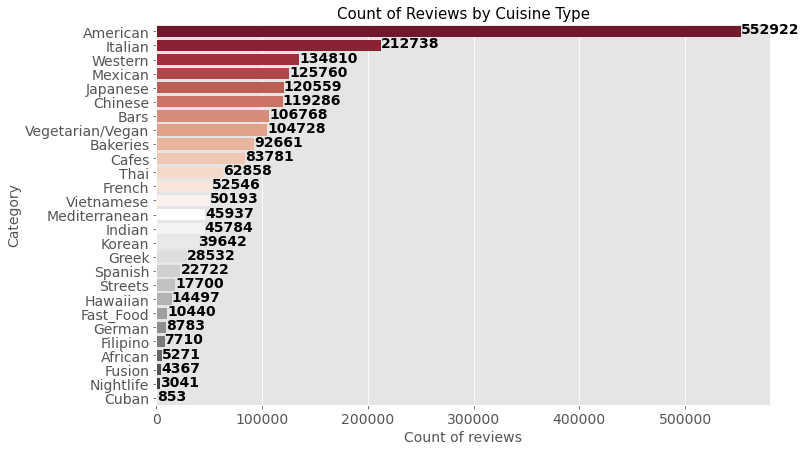

In [10]:
plt.figure(figsize=(11,7))
grouped = restaurants.groupby('category')['review_count'].sum().sort_values(ascending = False)
sns.barplot(y=grouped.index, x= grouped.values, palette= sns.color_palette("RdGy", len(grouped)) )
plt.ylabel('Category', fontsize=14)
plt.xlabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews by Cuisine Type', fontsize=15)
for i,v in enumerate(grouped):
    plt.text(v, i+0.15, str(v),fontweight='bold', fontsize=14)
plt.tick_params(labelsize=14)

## Top 10 restaurants with most reviews

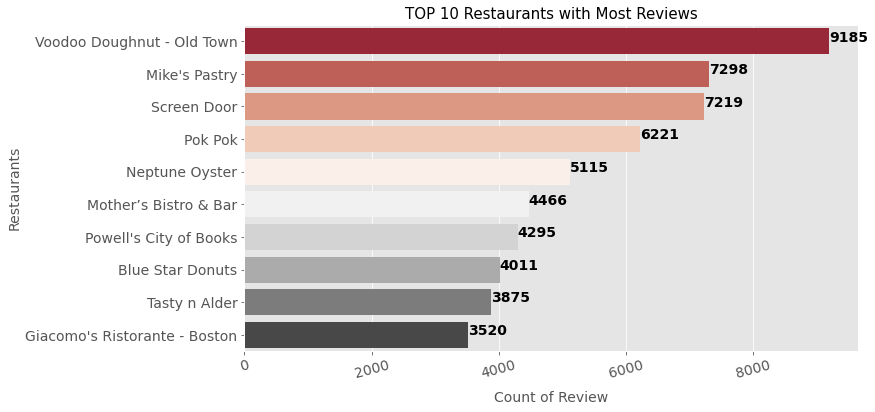

In [11]:
plt.figure(figsize=(11,6))
grouped = restaurants[['name','review_count']].sort_values(by='review_count', ascending=False)[:10]
sns.barplot(x=grouped.review_count, y = grouped.name, palette=sns.color_palette("RdGy", len(grouped)), ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 10 Restaurants with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)

## Clean user reviews

### Convert date to datetime data type

In [12]:
# convert 'date' to datetime
user_reviews['date'] = pd.to_datetime(user_reviews['date'], format = '%Y/%m/%d')

In [13]:
# create year columns
user_reviews['year'] = user_reviews.date.dt.year

In [14]:
# sort reviews based on date
reviews_datesort = user_reviews.sort_values(by=['date'])
reviews_datesort.head()

index               review_id                 user_id  \
222707    874273  7EnXf4kH6fDFwFRHVFfImg  T7sGPimU6yTg-Rl3cAk5PA   
1586290  6036940  7bg6DQfznrkC1uDTtX_piQ  6IJvrFm0X3OTy6HoDWaLpg   
1345951  5160442  YFfN28kfffNlypDeqnBEng  yYSBB5q7bY-qSVvmMgk4FA   
444818   1704367  XgFWZiG83CryNfEE6Z0cJA  LFLpi-FfgDW4zpcdz3hfSQ   
2039223  7782100  T_XaKn0kkmroONcnAgHgxQ  TXuGgJI3_fEiUYQ355Ijwg   

                    business_id  stars  useful  funny  cool  \
222707   ZBi3FCNSGYSs9lM-5FKcbg    4.0       0      0     0   
1586290  sf04_4kcxi6UkXMUls0wGA    5.0       1      0     1   
1345951  jI4yOYZ7nZt1Yv_9GolxYg    4.0       0      0     0   
444818   kLr68qdt6nutZCuCMz5mDg    5.0       0      0     0   
2039223  Hnx34LxtfW4XV0gZ18zMBg    5.0       0      0     0   

                                                      text  \
222707   excellent affordable moroccan food in a cosy l...   
1586290  Stylin' place with delicious niveau Italian fo...   
1345951  A bit pricey, but definitely good food.  Go up...   
444818   One of the best and unknown places in Boston -...   
2039223  Not sure it's the Best but it's excellent. Mon...   

                       date  year  
222707  2004-10-13 00:03:20  2004  
1586290 2004-10-13 04:57:06  2004  
1345951 2004-10-14 01:02:19  2004  
444818  2004-10-14 02:57:52  2004  
2039223 2004-10-14 06:59:03  2004

In [15]:
reviews_datesort['stars'].unique()

array([4., 5., 3., 2., 1.])

### Analysis of reviews over time



In [16]:
reviews_datesort['comment_year_month'] = reviews_datesort['date'].dt.strftime('%Y-%m')

In [17]:
def remove_date(date):
    reviews_datesort.drop(reviews_datesort.loc[reviews_datesort['comment_year_month'] == date].index, inplace=True)
    return reviews_datesort

In [18]:
date_remove = ['2004-10','2004-11','2004-12','2005-01','2005-02','2005-03'] 

In [19]:
for date in date_remove:
    remove_date(date)

In [20]:
reviews_group = reviews_datesort.groupby(['stars','comment_year_month']).agg(count=("stars", 'count'))
reviews_group_df = pd.DataFrame(reviews_group)

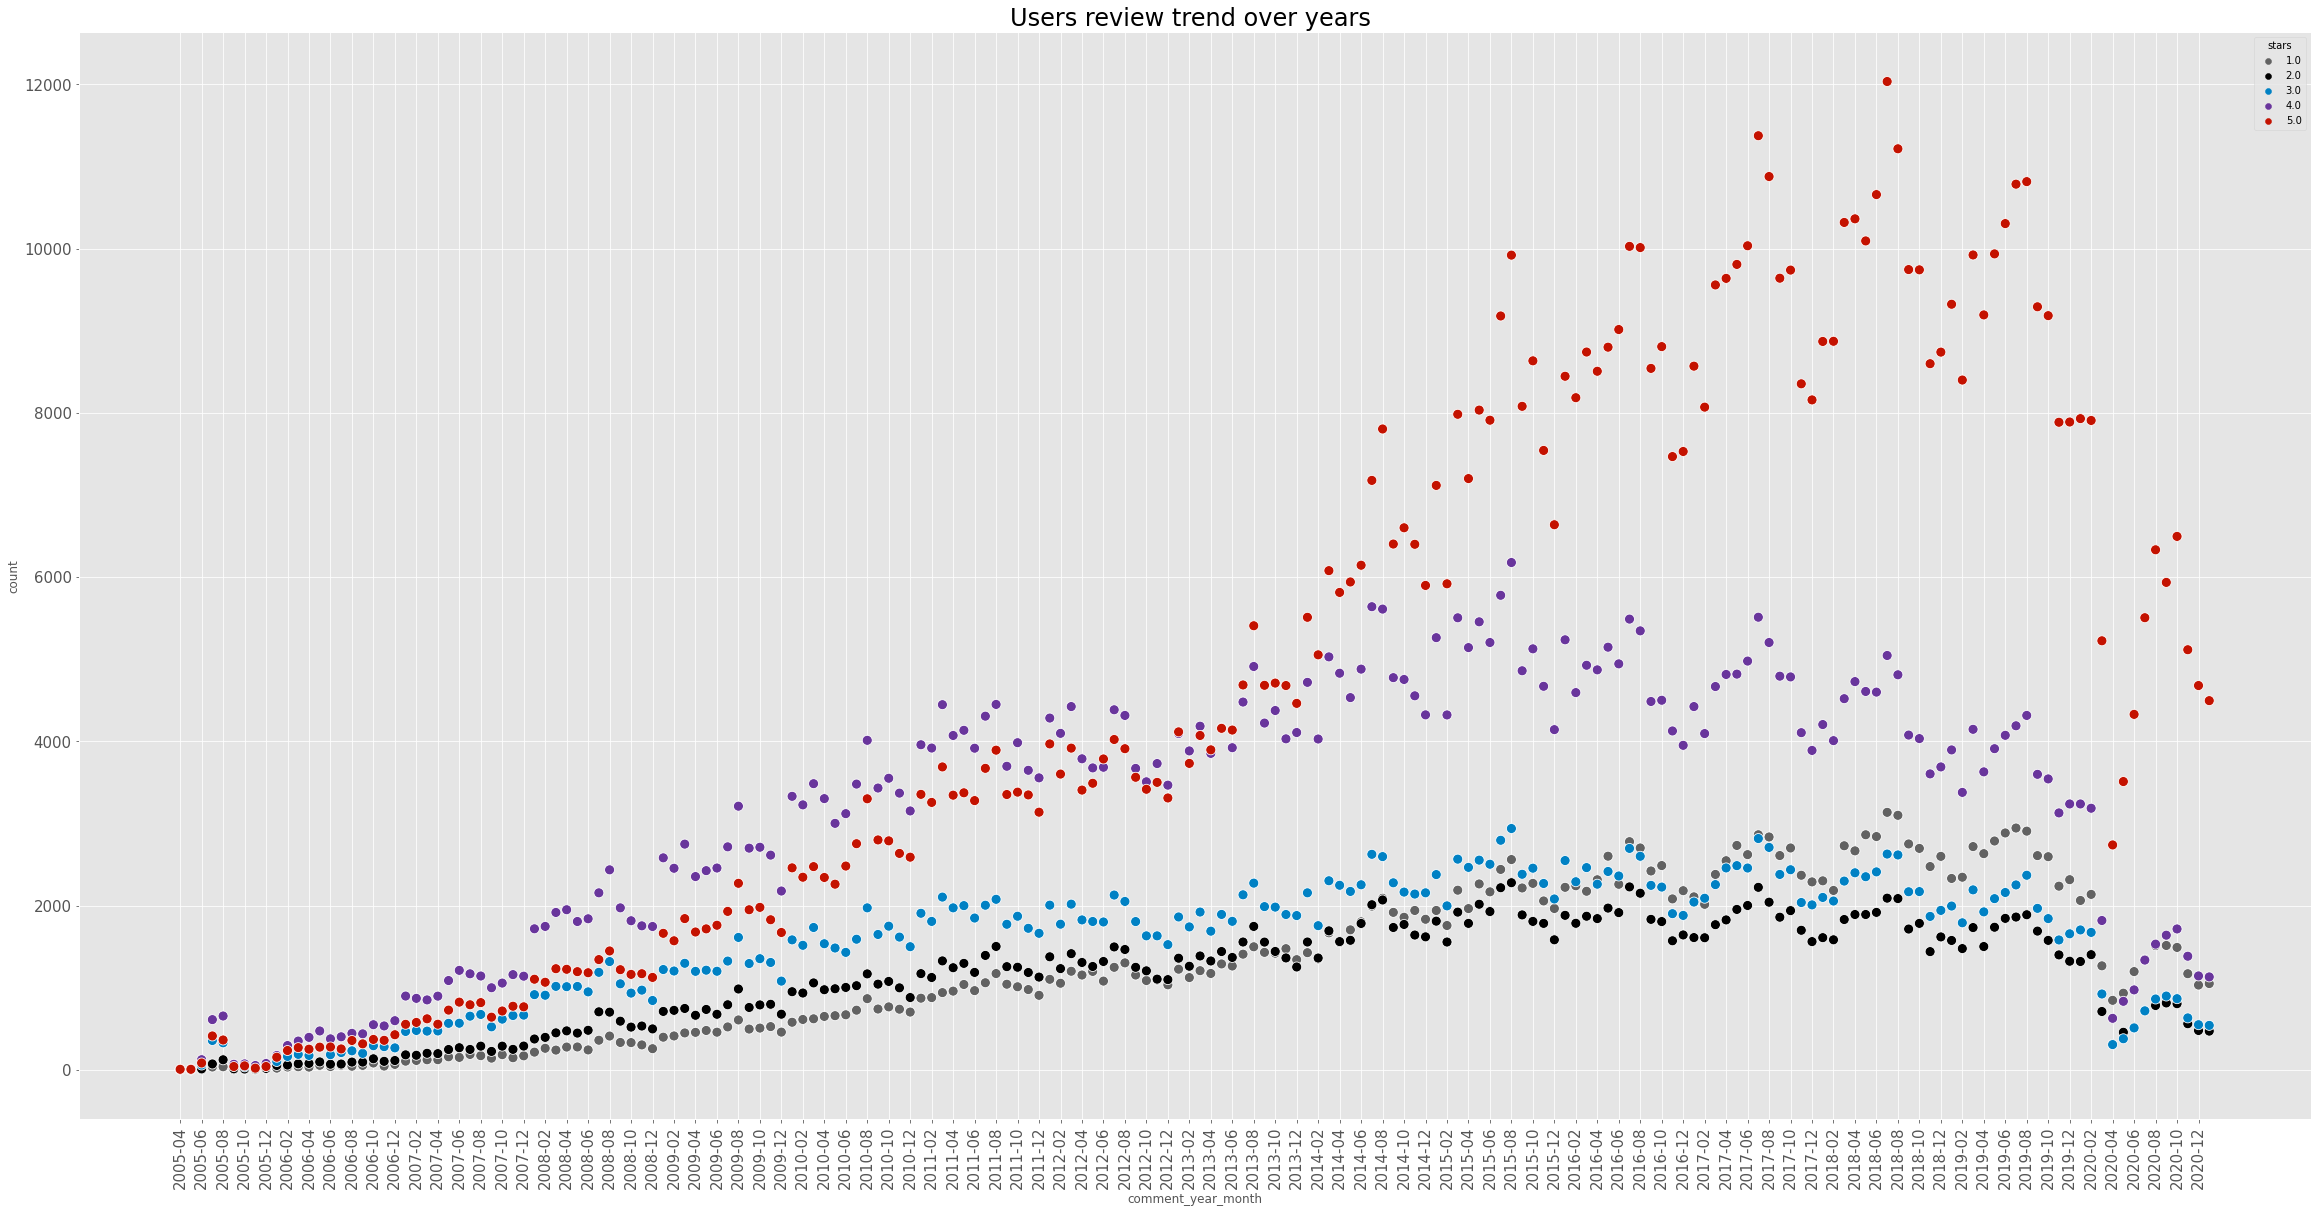

In [21]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(40, 20))
  
# drawing the plot
review_time = sns.scatterplot(x = "comment_year_month", y = "count",hue='stars', data=reviews_group_df, ax=ax, palette=['#626262', '#000000', '#0081c4',  '#69359c','#c41200'],s=100)
plt.xticks(fontsize= 15, rotation = 90)
plt.yticks(fontsize= 15)
#plt.tick_params(labelsize=20)
plt.title('Users review trend over years ',fontsize=24)
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)
plt.show()

### Analyse variable 'rating' to see if majority of the customer ratings are positive or negative.

<AxesSubplot:xlabel='stars'>

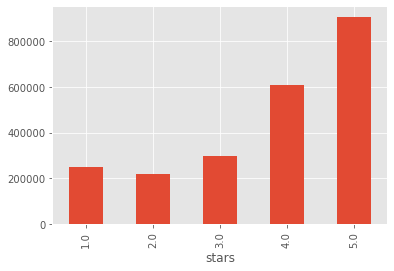

In [22]:
user_reviews.groupby('stars')['user_id'].count().plot(kind='bar')

Text(0, 0.5, 'Star Ratings')

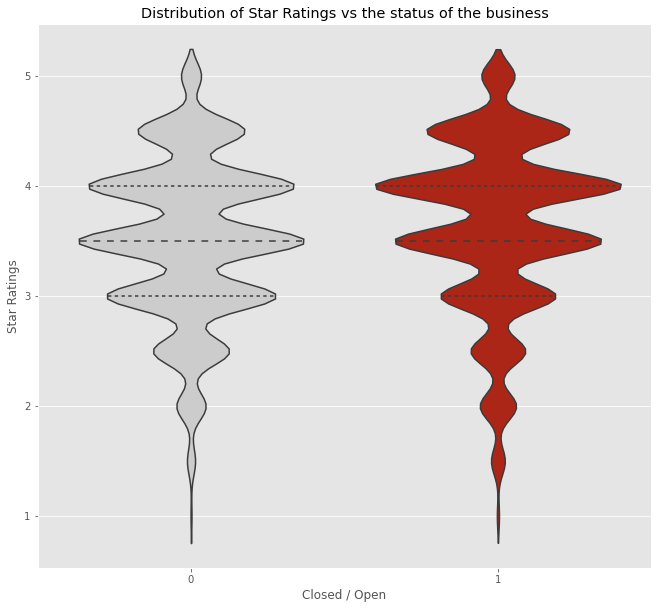

In [23]:
#violin plot for open and closed stars
plt.figure(figsize=(11,10))
g = sns.violinplot(y = 'stars', x='is_open', data = restaurants,
                  split=True,inner="quart", palette=['#CCCCCC','#c41200'])

plt.title("Distribution of Star Ratings vs the status of the business")
plt.xlabel('Closed / Open')
plt.ylabel('Star Ratings')

## User_reviews distribution

In [24]:
useful_reviews = len(user_reviews[user_reviews["useful"]>0])
cool_reviews = len(user_reviews[user_reviews["cool"]>0])
funny_reviews = len(user_reviews[user_reviews["funny"]>0])
negative_reviews = len(user_reviews[user_reviews["stars"]<2])
positive_reviews =len(user_reviews[user_reviews["stars"]>3])
total_reviews = len(user_reviews)

print("Total reviews: {}".format(total_reviews))
print("Useful reviews: {}".format(useful_reviews))
print("Funny reviews: {}".format(funny_reviews))
print("Cool reviews: {}".format(cool_reviews))
print("Total negative reviews: {}".format(negative_reviews))
print("Total positive reviews: {}".format(positive_reviews))

Total reviews: 2282296
Useful reviews: 938608
Funny reviews: 398450
Cool reviews: 482611
Total negative reviews: 248423
Total positive reviews: 1517610


## Top reviewed restaurants

In [25]:
top_reviewed = user_reviews[user_reviews["stars"]>3]
top_reviews_dict ={}

for business_id in top_reviewed["business_id"].values:
    try :
        top_reviews_dict[business_id] = top_reviews_dict[business_id]+1
    except:
        top_reviews_dict[business_id]=1

topbusiness = pd.DataFrame.from_dict(data= top_reviews_dict, orient="index")

topbusiness.reset_index(inplace=True)
topbusiness.columns = ['business_id', 'rated']
#del(top_reviews_dict)
#del(top_reviewed)

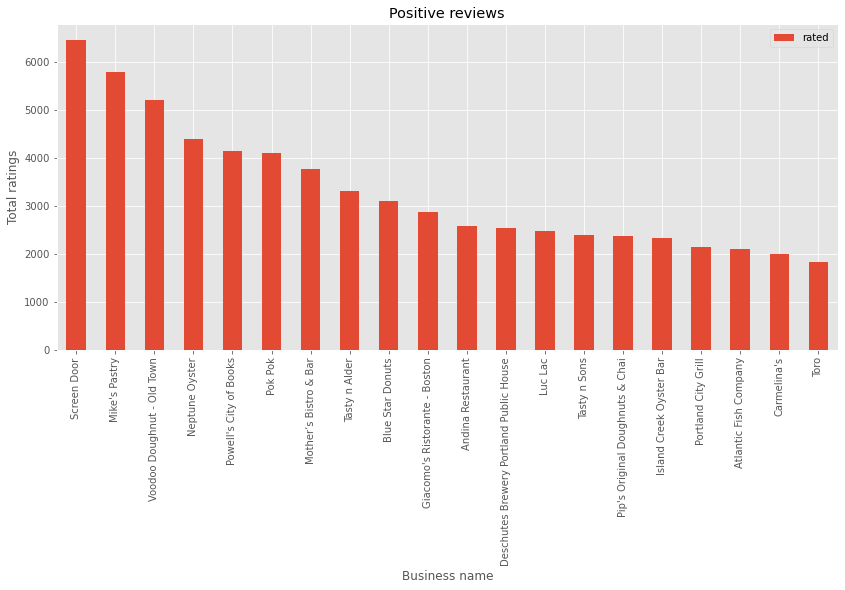

In [26]:
top_count= 20
right=pd.DataFrame(restaurants[['business_id',"name","category"]].values,
                    columns=['business_id',"Business name","category"])

top_business_data = pd.merge(topbusiness,right=right, how="inner",on='business_id')
top_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Positive reviews').set_ylabel("Total ratings")

del(topbusiness)
del(right)

### How businesses are getting reviewed over time

In [27]:
num_business = 4
business_ids = top_business_data.sort_values("rated")[::-1][:num_business].business_id.values
business_names = top_business_data.sort_values("rated")[::-1][:num_business]["Business name"].values

<ipython-input-28-aa7bd2ecd81e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



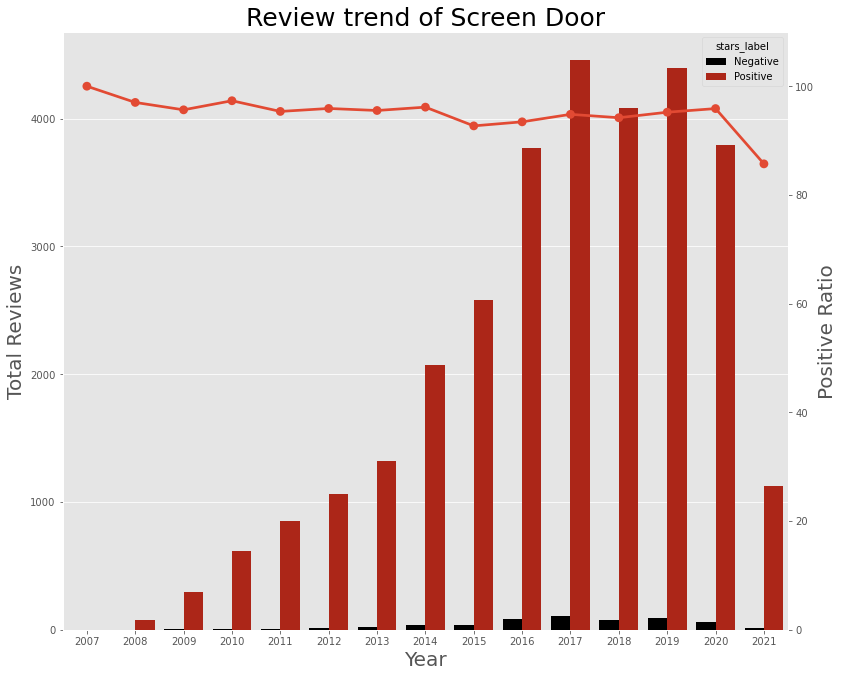

<ipython-input-28-aa7bd2ecd81e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



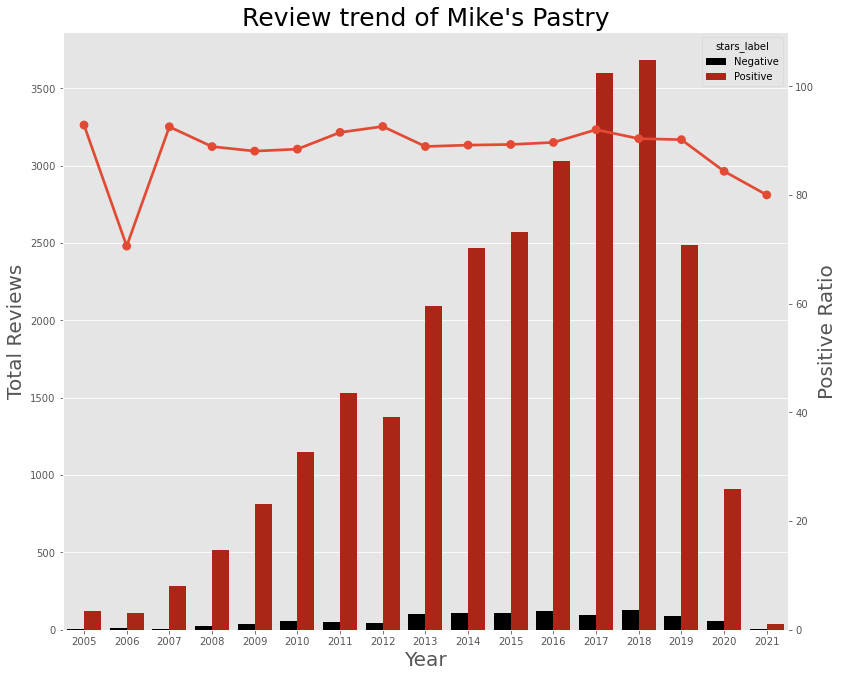

<ipython-input-28-aa7bd2ecd81e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



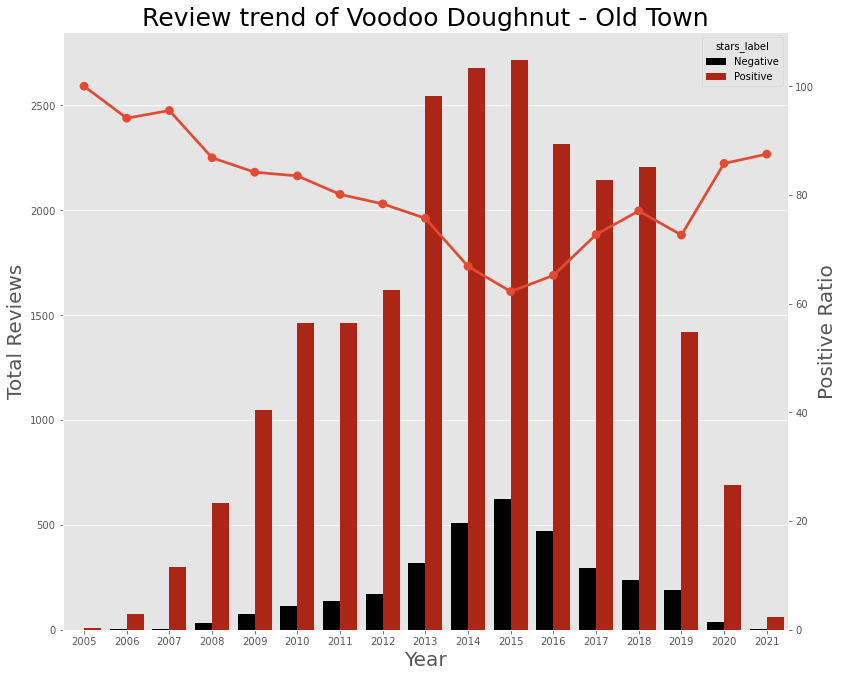

<ipython-input-28-aa7bd2ecd81e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



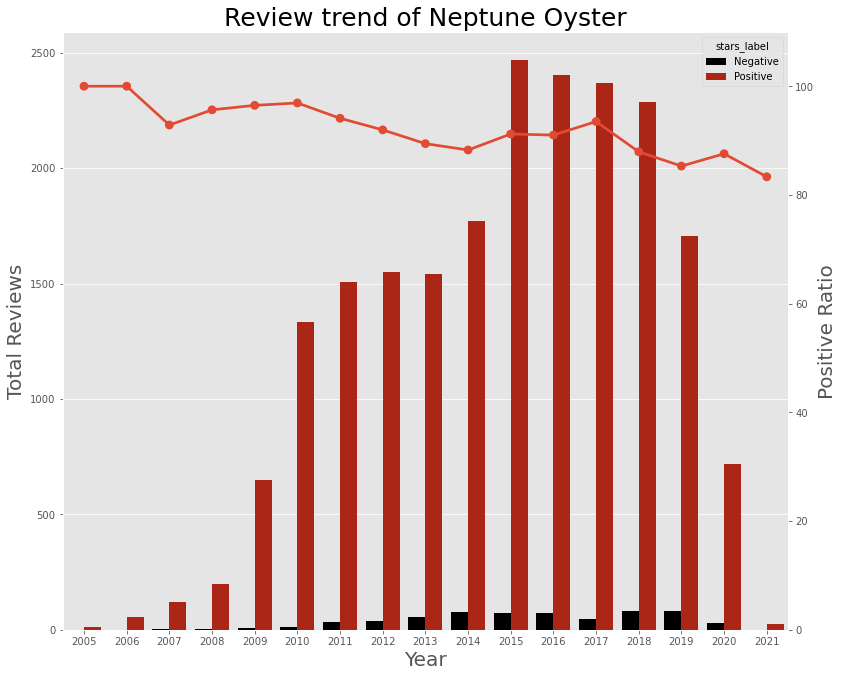

In [28]:
for i, business_id in enumerate(business_ids):
    
    # create temporary dataset by 'business_id'
    restaurant_temp =  user_reviews[user_reviews['business_id'] == business_id]
    # label positive & negative reviews
    restaurant_temp['stars_label']  = restaurant_temp['stars'].apply(lambda star: 'Positive' if star > 3 else ( 'Negative' if star < 3 else 'Neutral'))
    # drop Neutral 
    restaurant_temp =  restaurant_temp[restaurant_temp["stars_label"].str.contains("Neutral")==False]

    
    # group restaurant by stars_label, calculate the sum of stars
    restaurant_group = restaurant_temp.groupby(['stars_label','year']).agg(Total_reviews=("stars", 'sum'))
    restaurant_group = restaurant_group.reset_index()
    
    #calculate ratio of positive reviews
    ratio = restaurant_temp.groupby('year')['stars_label'].value_counts(normalize=True).mul(100)
    ratio.index.names = ['year','label']
    ratio = ratio.reset_index()
    ratio = ratio.rename({'stars_label': 'ratio'},axis=1)
    ratio = ratio.rename({'label': 'stars_label'},axis=1)
    ratio.sort_values(by =['stars_label','year'], ascending=True)
    
    #merge sum of stars and positive reviews
    restaurant_merge = pd.merge(restaurant_group, ratio, on=['stars_label','year'], how='inner')
    
    # plot combined linegraph and barplot
    #Create combo chart
    fig, ax1 = plt.subplots(figsize=(13,11))

    #bar plot creation
    ax1 = sns.barplot(x='year', y='Total_reviews',hue="stars_label", data = restaurant_merge,palette=['#000000','#c41200'])
    ax1.set_title('Review trend of {}'.format(business_names[i]), fontsize=25)
    ax1.set_xlabel('Year', fontsize=20)
    ax1.set_ylabel('Total Reviews', fontsize=20)
    ax1.tick_params(axis='y')


    #specify we want to share the same x-axis
    ax2 = ax1.twinx()
    color = 'tab:red'

    #line plot creation

    ax2 = sns.pointplot(x='year', y='ratio', data = restaurant_merge[(restaurant_merge['stars_label'] == 'Positive')], sort=False)
    ax2.tick_params(axis='y')
    ax2.set(ylim=(0, 110))
    ax2.set_ylabel('Positive Ratio', fontsize=20)
    ax2.grid(False)
    
    #show plot
    plt.show()

## Most recent Trending businesses

In [29]:
top_business = 3
temp = user_reviews[["business_id",'year',"stars"]]
five_star_reviews = temp[temp["stars"]>4]
trending_business_reviews = five_star_reviews.groupby(["business_id",'year']).size().reset_index(name='counts')
trending = trending_business_reviews.sort_values(['year','counts'])[::-1][:top_business].business_id.values

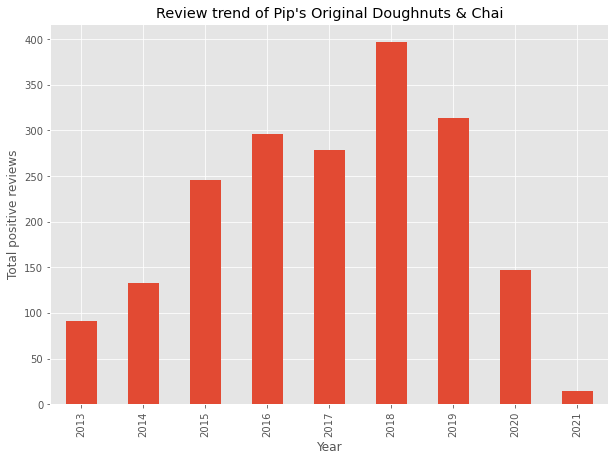

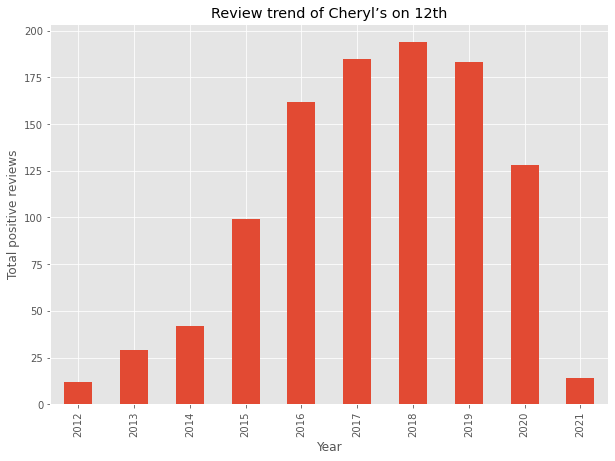

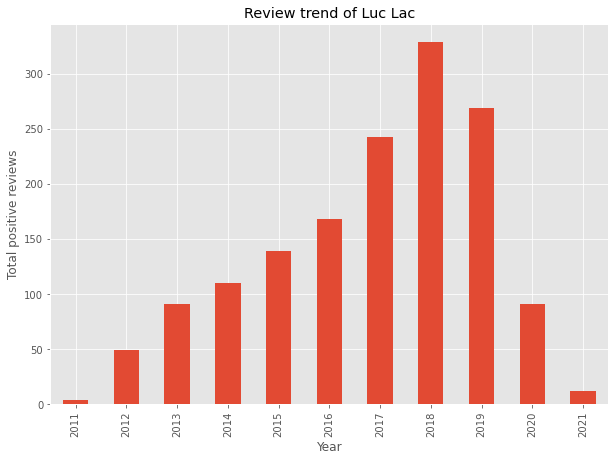

In [30]:
for  business_id in trending:
    record = trending_business_reviews.loc[trending_business_reviews['business_id'] == business_id]
    business_name = restaurants.loc[restaurants['business_id'] == business_id].name.values[0]
    series = pd.Series(record["counts"].values, index=record.year.values, name='Trending business')
    axes = series.plot(kind="bar",figsize=(10, 7))
    plt.xlabel('Year', axes=axes)
    plt.ylabel('Total positive reviews', axes=axes)
    plt.title('Review trend of {}'.format(business_name), axes=axes)
    plt.show()
    #len(trending_business_reviews)

## Negatively reviewed businesses¶

In [31]:
bottom_reviewed = user_reviews[user_reviews["stars"]<=1]
bottom_reviews_dict ={} 

for business_id in bottom_reviewed["business_id"].values:
    try :
        bottom_reviews_dict[business_id] =bottom_reviews_dict[business_id]+1
    except:
        bottom_reviews_dict[business_id]=1
        
bottombusiness = pd.DataFrame.from_dict(data= bottom_reviews_dict,orient="index")

bottombusiness.reset_index(inplace=True)
#bottombusiness.head()
bottombusiness.columns = ['business_id', 'rated']

Text(0, 0.5, 'Total 1 star ratings')

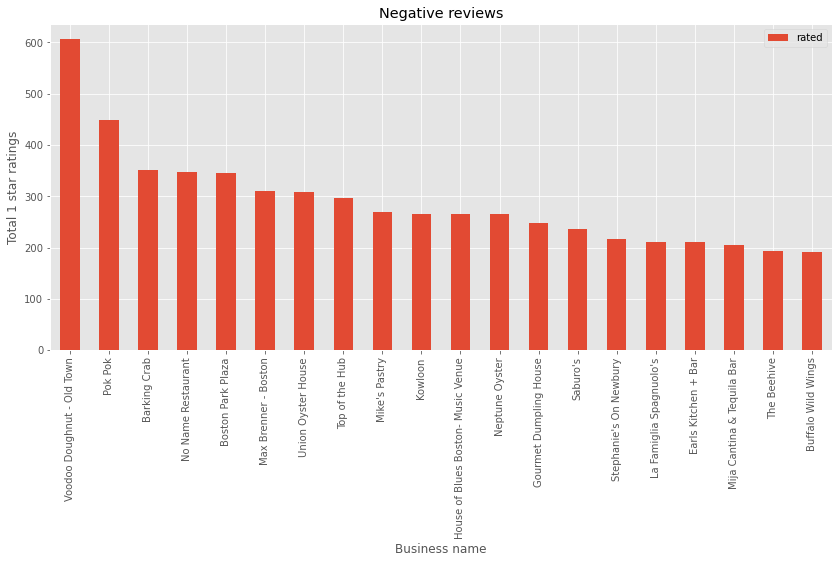

In [32]:
top_count= 20
right=pd.DataFrame(restaurants[['business_id',"name","category"]].values,
                    columns=['business_id',"Business name","category"])

bottom_business_data = pd.merge(bottombusiness,right=right, how="inner",on='business_id')
bottom_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Negative reviews').set_ylabel("Total 1 star ratings")

#del(bottom_reviewed)
#del(bottom_reviews_dict)
#del(bottombusiness)
#del(right)

In [33]:
num_business = 7
business_ids = bottom_business_data.sort_values("rated")[::-1][:num_business].business_id.values
business_names = bottom_business_data.sort_values("rated")[::-1][:num_business]["Business name"].values

<ipython-input-34-aa7bd2ecd81e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



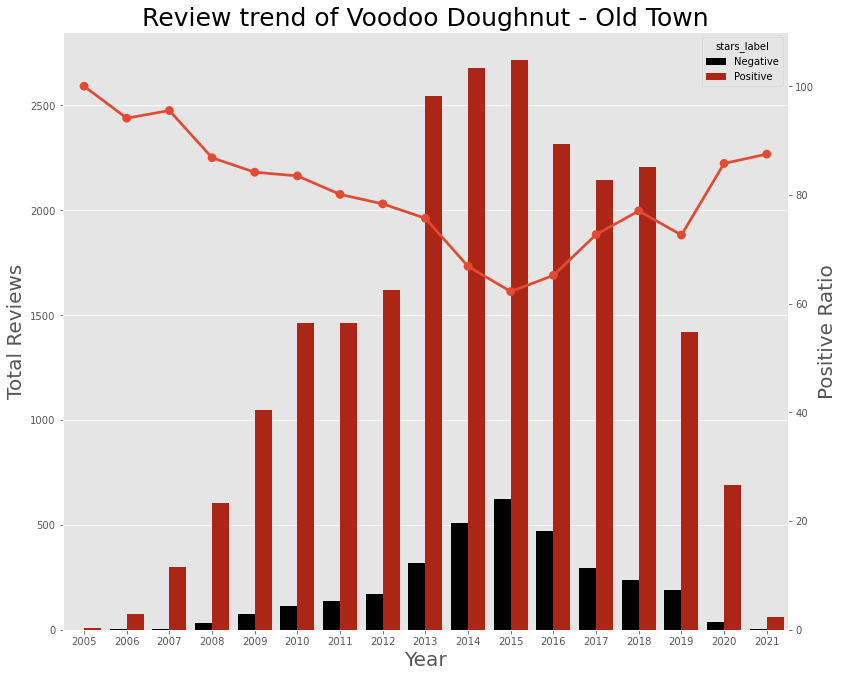

<ipython-input-34-aa7bd2ecd81e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



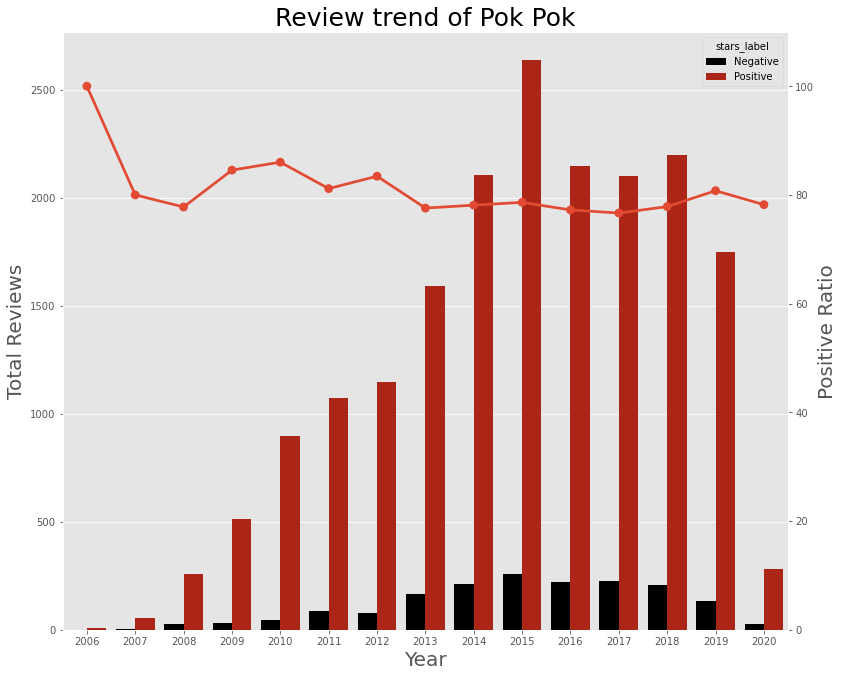

<ipython-input-34-aa7bd2ecd81e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



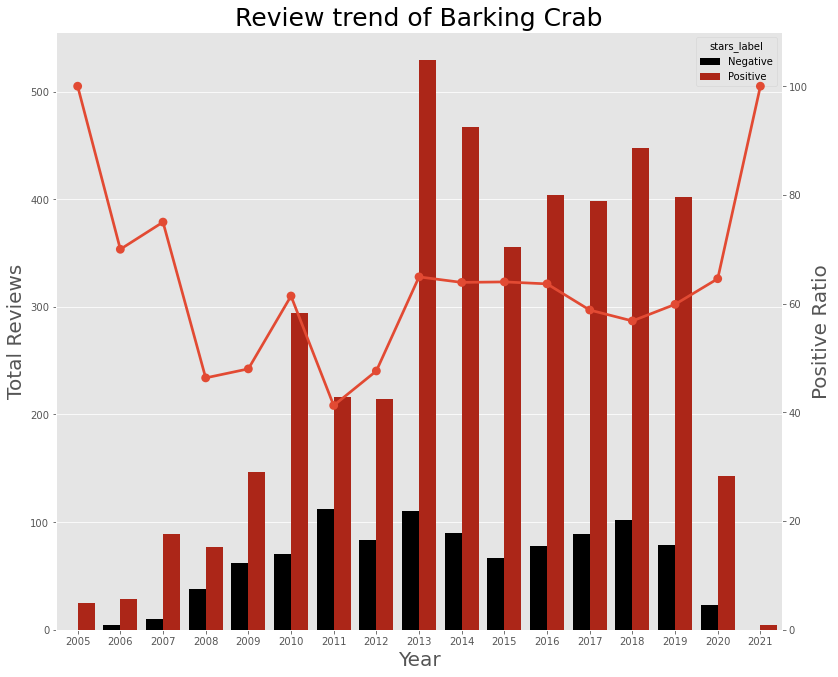

<ipython-input-34-aa7bd2ecd81e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



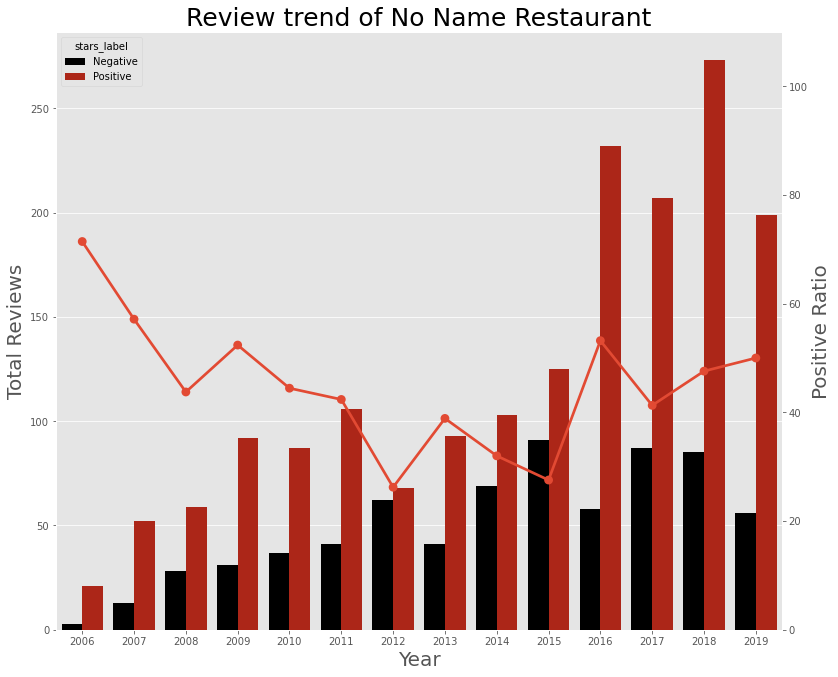

<ipython-input-34-aa7bd2ecd81e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



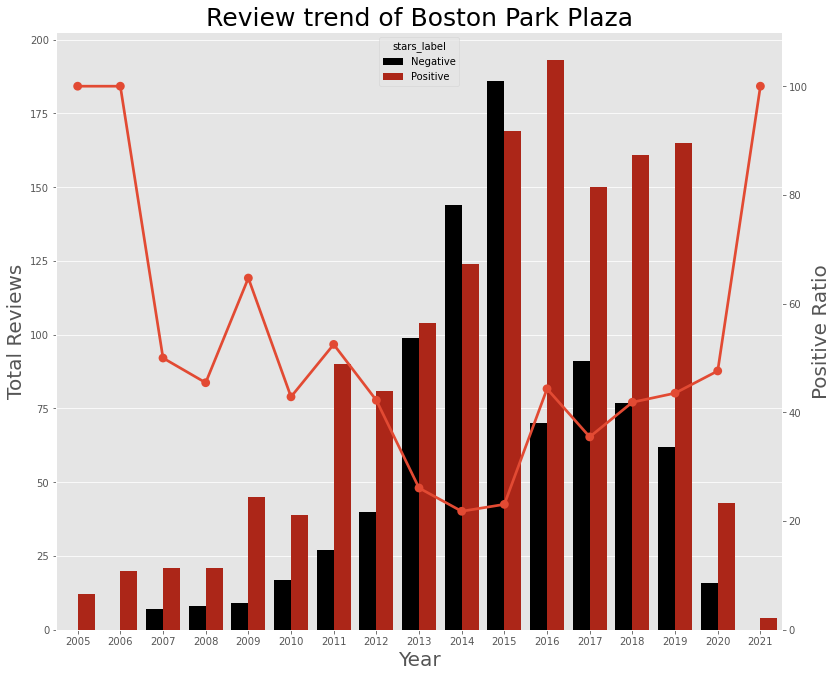

<ipython-input-34-aa7bd2ecd81e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



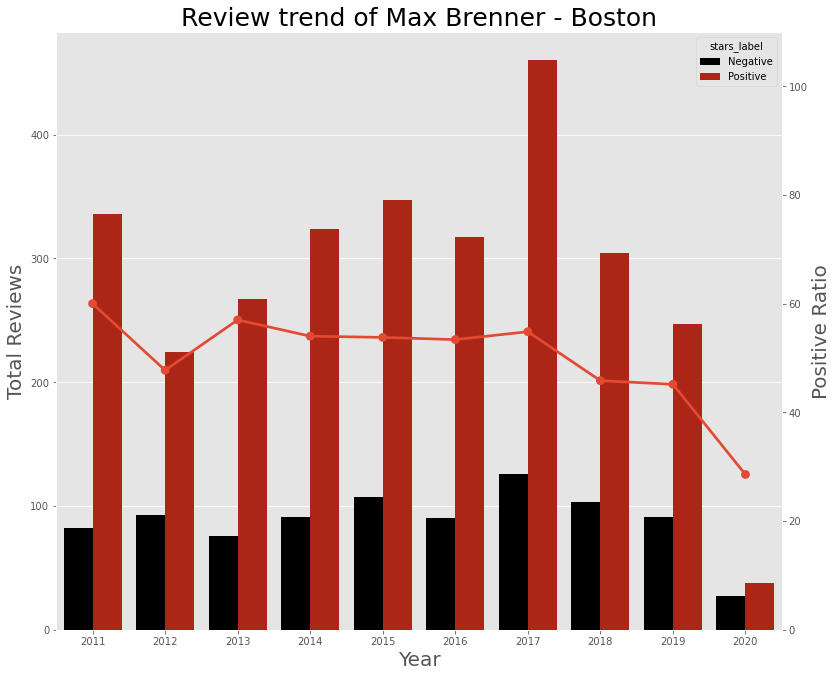

<ipython-input-34-aa7bd2ecd81e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



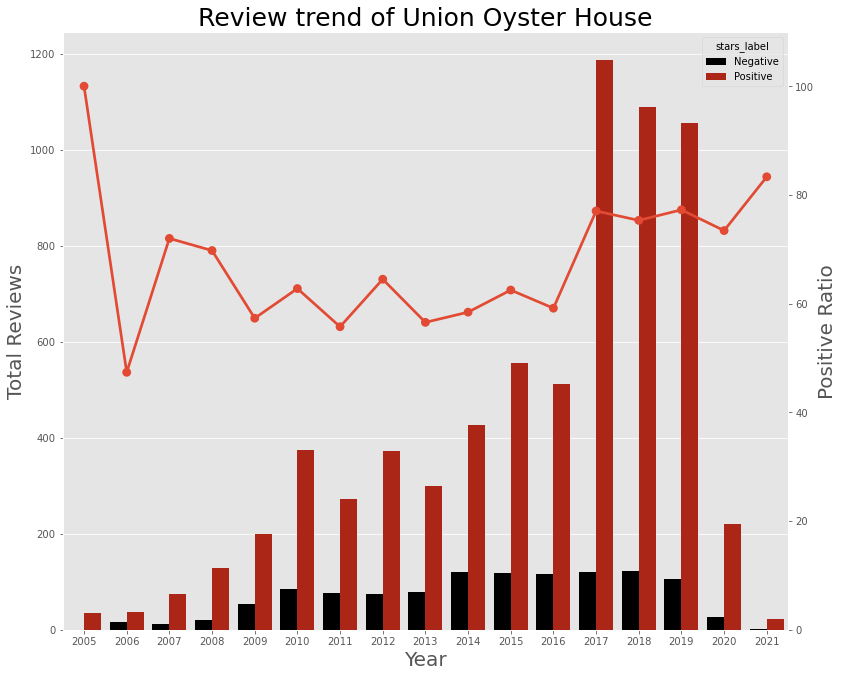

In [34]:
for i, business_id in enumerate(business_ids):
    
    # create temporary dataset by 'business_id'
    restaurant_temp =  user_reviews[user_reviews['business_id'] == business_id]
    # label positive & negative reviews
    restaurant_temp['stars_label']  = restaurant_temp['stars'].apply(lambda star: 'Positive' if star > 3 else ( 'Negative' if star < 3 else 'Neutral'))
    # drop Neutral 
    restaurant_temp =  restaurant_temp[restaurant_temp["stars_label"].str.contains("Neutral")==False]

    
    # group restaurant by stars_label, calculate the sum of stars
    restaurant_group = restaurant_temp.groupby(['stars_label','year']).agg(Total_reviews=("stars", 'sum'))
    restaurant_group = restaurant_group.reset_index()
    
    #calculate ratio of positive reviews
    ratio = restaurant_temp.groupby('year')['stars_label'].value_counts(normalize=True).mul(100)
    ratio.index.names = ['year','label']
    ratio = ratio.reset_index()
    ratio = ratio.rename({'stars_label': 'ratio'},axis=1)
    ratio = ratio.rename({'label': 'stars_label'},axis=1)
    ratio.sort_values(by =['stars_label','year'], ascending=True)
    
    #merge sum of stars and positive reviews
    restaurant_merge = pd.merge(restaurant_group, ratio, on=['stars_label','year'], how='inner')
    
    # plot combined linegraph and barplot
    #Create combo chart
    fig, ax1 = plt.subplots(figsize=(13,11))

    #bar plot creation
    ax1 = sns.barplot(x='year', y='Total_reviews',hue="stars_label", data = restaurant_merge,palette=['#000000','#c41200'])
    ax1.set_title('Review trend of {}'.format(business_names[i]), fontsize=25)
    ax1.set_xlabel('Year', fontsize=20)
    ax1.set_ylabel('Total Reviews', fontsize=20)
    ax1.tick_params(axis='y')


    #specify we want to share the same x-axis
    ax2 = ax1.twinx()
    color = 'tab:red'

    #line plot creation

    ax2 = sns.pointplot(x='year', y='ratio', data = restaurant_merge[(restaurant_merge['stars_label'] == 'Positive')], sort=False)
    ax2.tick_params(axis='y')
    ax2.set(ylim=(0, 110))
    ax2.set_ylabel('Positive Ratio', fontsize=20)
    ax2.grid(False)
    
    #show plot
    plt.show()

## Restaurant Chains & geography

Conduct additional feature engineering to improve the model.
Is the business part of a chain.

In [35]:
restaurants.head()

business_id                           name              address  \
0  tCbdrRPZA0oiIYSmHG3J0w        Flying Elephants at PDX  7000 NE Airport Way   
1  HPA_qyMEddpAEtFof02ixg            Mr G's Pizza & Subs        474 Lowell St   
2  jGennaZUr2MsJyRhijNBfA                Legal Sea Foods      1 Harborside Dr   
3  iPD8BBvea6YldQZPHzVrSQ                Espresso Minute         334 Mass Ave   
4  jx91IMdGOmLOo8h_F9z39g  Cleary's Restaurant & Spirits   12429 NE Glisan St   

       city state postal_code   latitude   longitude  stars  review_count  \
0  Portland    OR       97218  45.588906 -122.593331    4.0           126   
1   Peabody    MA       01960  42.541155  -70.973438    4.0            39   
2    Boston    MA       02128  42.363442  -71.025781    3.5           856   
3    Boston    MA       02115  42.342673  -71.084239    4.5             7   
4  Portland    OR       97230  45.526473 -122.535323    3.5            19   

   ...  garage    lot  street  valet validated RestaurantsAttire NoiseLevel  \
0  ...    True  False   False  False     False            casual          2   
1  ...   False   True   False  False     False            casual          2   
2  ...    True  False   False  False     False            casual          2   
3  ...   False  False   False  False     False            casual          1   
4  ...   False   True   False  False     False            casual          2   

   WiFi        Alcohol sentiment_final  
0  Free  beer_and_wine        0.366400  
1  Free            NaN        0.132592  
2  Free       full_bar        0.090394  
3   NaN            NaN        0.655234  
4    No       full_bar       -0.114162  

[5 rows x 43 columns]

In [36]:
#get all names that are lower and duplicated
name_lower = restaurants['name'].str.lower().copy()

In [37]:
name_val_count = name_lower.value_counts(sort=True, ascending=False)

In [38]:
#see very very popular chains
name_val_count[:30]

subway                           174
mcdonald's                       138
dunkin'                           86
domino's pizza                    70
burger king                       70
starbucks                         68
taco bell                         56
chipotle mexican grill            55
wendy's                           46
papa gino's pizzeria              39
panera bread                      34
pizza hut                         33
papa murphy's                     31
kfc                               28
five guys                         26
panda express                     26
au bon pain                       24
99 restaurants                    22
b.good                            21
qdoba mexican eats                19
bertucci's italian restaurant     19
burgerville                       18
jimmy john's                      18
papa john's pizza                 17
sweetgreen                        16
jack in the box                   16
comella's                         15
p

In [39]:
#see even less popular chains
name_val_count[(name_val_count.values==3)]

straight from new york pizza    3
game on                         3
don pedro                       3
small pharaoh's                 3
kelly's roast beef              3
                               ..
grassa                          3
tilt                            3
pine state biscuits             3
bombay club                     3
seattle's best coffee           3
Name: name, Length: 182, dtype: int64

In [40]:
# Let chain be restaurants that has at least 5 identical entries

#get chain names
chain_names = name_val_count[(name_val_count.values>=5)].index.tolist()
#see samples
chain_names[:10]

['subway',
 "mcdonald's",
 "dunkin'",
 "domino's pizza",
 'burger king',
 'starbucks',
 'taco bell',
 'chipotle mexican grill',
 "wendy's",
 "papa gino's pizzeria"]

In [41]:
#distribution among target value
restaurants.groupby(by='is_open', as_index=True).mean()[['chain']]

chain
is_open          
0        0.080099
1        0.167433

In [42]:
chain_restaurant = name_val_count[(name_val_count.values>=5)]
chain_restaurant = pd.DataFrame(chain_restaurant)

In [43]:
chain_restaurant.rename(columns={"name": "Count"})

Count
subway                  174
mcdonald's              138
dunkin'                  86
domino's pizza           70
burger king              70
...                     ...
pastini                   5
saté grill-on-wheels      5
stash's pizza             5
ufood grill               5
d'angelo                  5

[154 rows x 1 columns]

In [44]:
type(chain_restaurant)

pandas.core.frame.DataFrame

In [45]:
chain_restaurant.reset_index(inplace=True)
chain_restaurant = chain_restaurant.rename(columns = {'index':'restaurants','name':'count'})

In [46]:
chain_restaurant

restaurants  count
0                  subway    174
1              mcdonald's    138
2                 dunkin'     86
3          domino's pizza     70
4             burger king     70
..                    ...    ...
149               pastini      5
150  saté grill-on-wheels      5
151         stash's pizza      5
152           ufood grill      5
153              d'angelo      5

[154 rows x 2 columns]

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

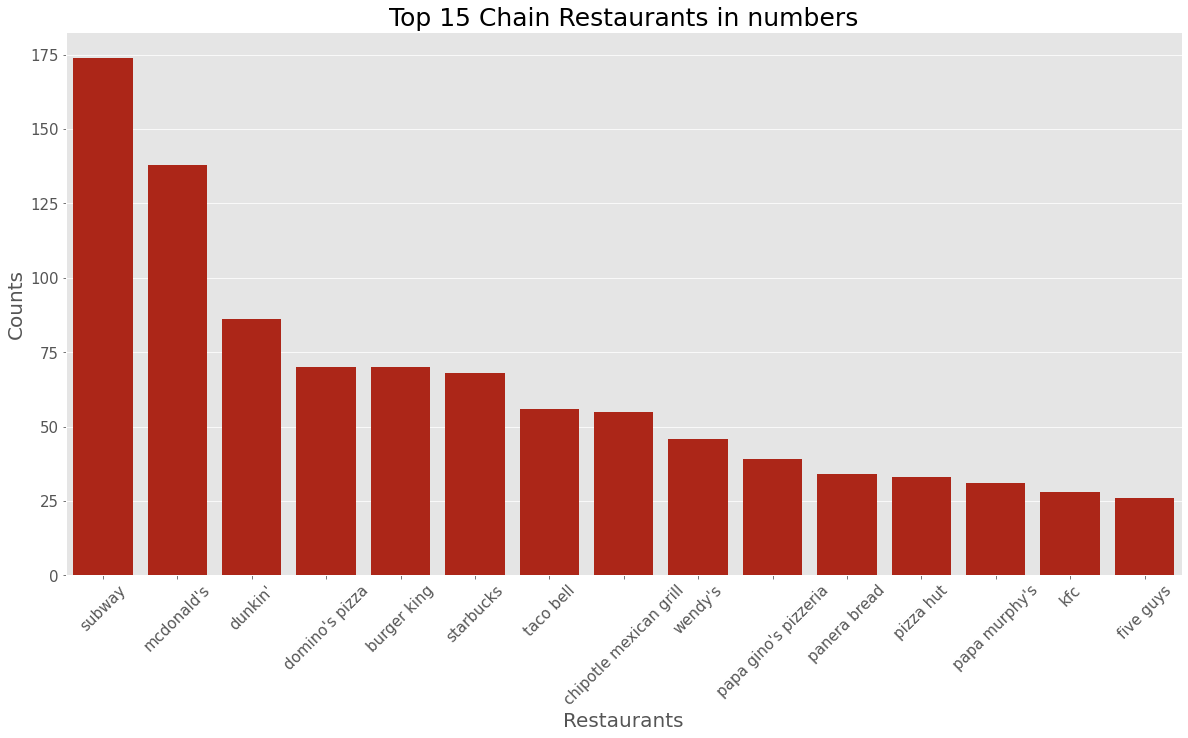

In [47]:
# Set the figure size
plt.figure(figsize=(20, 10))

# plot a bar chart
chain_bar = sns.barplot(
    x='restaurants',
    y='count', 
    data=chain_restaurant.head(15),
    estimator=sum, 
    ci=None, 
    color='#c41200')
plt.title("Top 15 Chain Restaurants in numbers",fontsize=25)
plt.xlabel('Restaurants',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.xticks(fontsize= 15, rotation = 45)
plt.yticks(fontsize=15)

In [48]:
restaurants[(restaurants['is_open']== 1) &(restaurants['chain']== 0)].shape

(8150, 43)

In [49]:
df_1 = restaurants.loc[:, ["is_open", "chain"]]

In [50]:
df_1

is_open  chain
0            1      0
1            1      0
2            1      1
3            0      0
4            1      0
...        ...    ...
16251        1      0
16252        1      0
16253        0      0
16254        0      0
16255        1      0

[16256 rows x 2 columns]

In [51]:
groupby = df_1.groupby("chain", axis=0)
groupby_df = groupby.mean()

In [52]:
groupby_df.reset_index(inplace=True)
groupby_df = groupby_df.rename(columns = {'index':'chain','name':'is_open'})


In [53]:
groupby_df

chain   is_open
0      0  0.578055
1      1  0.759852

## Plot chain vs non chain restaurants `is_open` rate

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

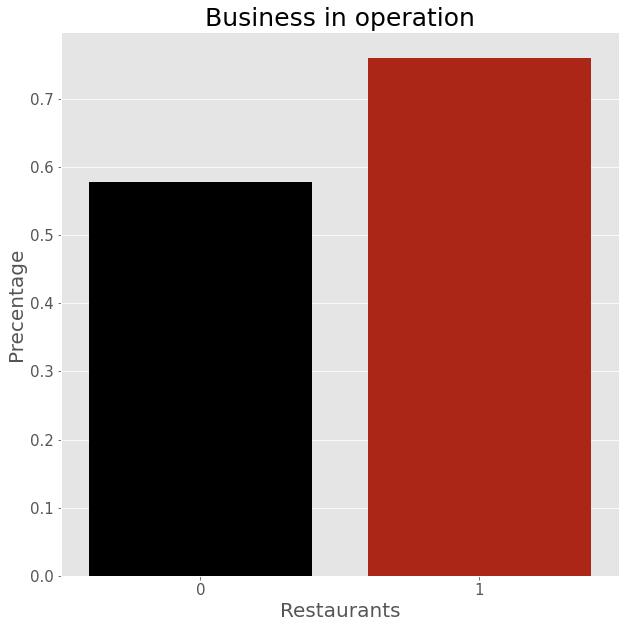

In [54]:
plt.figure(figsize=(10,10))
#sns.set_style("whitegrid")
ax = sns.barplot(x='chain' , y='is_open', data= groupby_df, palette=['#000000','#c41200'])
plt.title("Business in operation",fontsize=25)
plt.xlabel('Restaurants',fontsize=20)
plt.ylabel('Precentage',fontsize=20)
#plt.ylim(0,100)
plt.xticks(fontsize= 15)
plt.yticks(fontsize=15)

## EDA of restaurants ['categories']

### Top 10 categories of closed restaurants

In [55]:
#business_overall = restaurants.assign(categories = restaurants.categories.str.split(', ')).explode('categories')
cat = restaurants[restaurants['is_open'] == 0].category.value_counts()
cat = cat.to_frame().reset_index()
cat.columns = ['category', 'Count']

In [56]:
cat= cat.sort_values(by = 'Count', ascending = False)

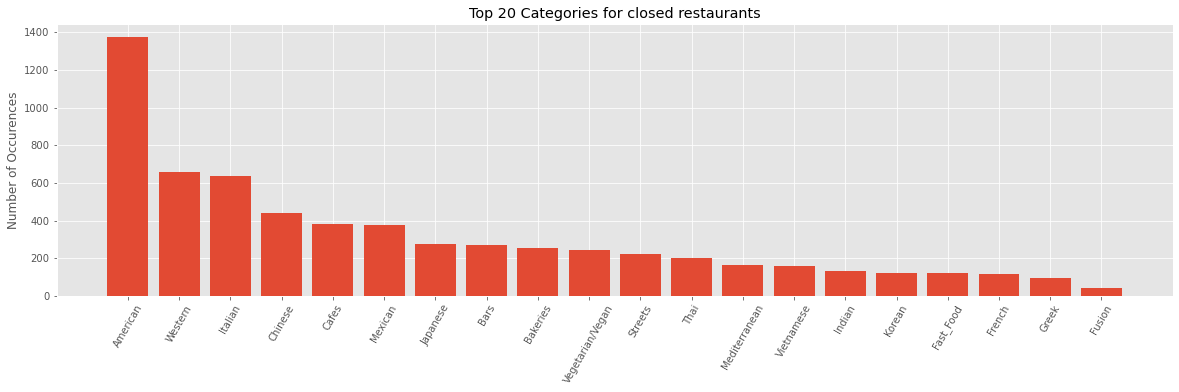

In [57]:
cat = cat[0:20]
objects = list(cat.category)
y_pos = np.arange(len(objects))
Numbers = list(cat.Count)

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects, rotation=60)
plt.ylabel('Number of Occurences')
plt.title('Top 20 Categories for closed restaurants')

plt.show()

### Price Range violin plot

latitude                                             \
                          count       mean       std        min        25%   
RestaurantsPriceRange2                                                       
1                        8337.0  43.871378  1.569284  42.100171  42.356327   
2                        7206.0  43.568626  1.526246  42.100998  42.351045   
3                         627.0  43.000930  1.263214  42.106303  42.348569   
4                          86.0  43.167838  1.389660  42.168649  42.349529   

                                                        longitude             \
                              50%        75%        max     count       mean   
RestaurantsPriceRange2                                                         
1                       42.551686  45.514428  45.642123    8337.0 -95.790565   
2                       42.452879  45.503523  45.613887    7206.0 -90.829057   
3                       42.363402  42.511965  45.601008     627.0 -81.454470   
4                       42.357540  44.752492  45.572100      86.0 -84.274444   

                        ... NoiseLevel      sentiment_final            \
                        ...        75%  max           count      mean   
RestaurantsPriceRange2  ...                                             
1                       ...        2.0  4.0          8337.0  0.046420   
2                       ...        2.0  4.0          7206.0  0.115628   
3                       ...        2.0  4.0           627.0  0.217816   
4                       ...        2.0  4.0            86.0  0.253443   

                                                                          \
                             std       min       25%       50%       75%   
RestaurantsPriceRange2                                                     
1                       0.425949 -0.999254 -0.238683  0.082104  0.359343   
2                       0.325354 -0.998574 -0.094527  0.148264  0.348160   
3                       0.285072 -0.911749  0.053367  0.257106  0.413486   
4                       0.360059 -0.996532  0.108809  0.337096  0.469048   

                                  
                             max  
RestaurantsPriceRange2            
1                       0.999456  
2                       0.995522  
3                       0.953665  
4                       0.821981  

[4 rows x 64 columns]

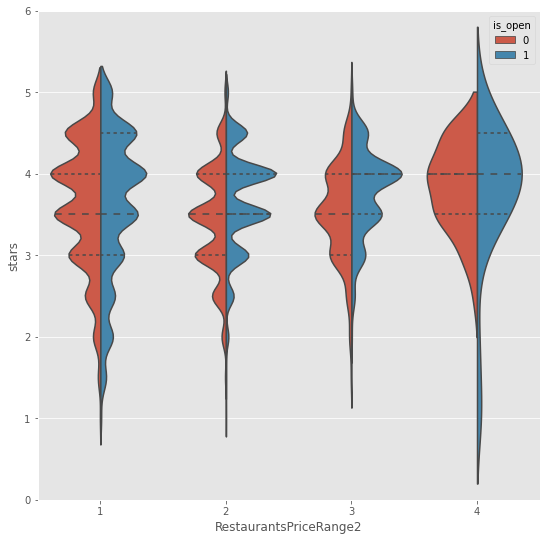

In [58]:
f, ax = plt.subplots(figsize=(9, 9))
sns.violinplot(x='RestaurantsPriceRange2',y='stars',hue='is_open',
               data= restaurants,split=True,inner="quart")
plt.ylim(0,6)
restaurants.groupby('RestaurantsPriceRange2').describe()